In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib as mpl

import os
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
mypath = 'data/stocks'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['ERIC.csv', 'HM.csv', 'INVE.csv', 'NDA.csv', 'SEBA.csv', 'TLSN.csv']

In [4]:

df = pd.DataFrame(columns = ['tick', 'datetime', 'volume', 'price'])

for file in onlyfiles:
    tick = file.split('.')[0]
    print(tick)
    df_tick = pd.read_csv('data\\stocks\\' + file)
    df_tick = df_tick.rename(columns = {'Local time':'datetime'})
    df_tick['tick'] = tick
    df_tick.columns = df_tick.columns.str.lower()
    df_tick['datetime'] = pd.to_datetime(df_tick['datetime'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc = True).dt.tz_convert(tz='Europe/Stockholm')
    df_tick = df_tick.sort_values(by='datetime')
    
    #FIX SPLIT
    if tick == 'INVE':
        df_tick.loc[df_tick['datetime'] < '2021-05-19', ['open','high','low','close']] = df_tick.loc[df_tick['datetime'] < '2021-05-19', ['open','high','low','close']]/4
        
    df_tick['price'] = df_tick[['close', 'open', 'low', 'high']].mean(axis=1)
    df_tick = df_tick.drop(columns=['high', 'low', 'open', 'close'])
    
    df = pd.concat([df, df_tick])

print(df.info())
df.head()

ERIC
HM
INVE
NDA
SEBA
TLSN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166750 entries, 0 to 361950
Data columns (total 4 columns):
 #   Column    Dtype                           
---  ------    -----                           
 0   tick      object                          
 1   datetime  datetime64[ns, Europe/Stockholm]
 2   volume    float64                         
 3   price     float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(2), object(1)
memory usage: 82.7+ MB
None


,tick,datetime,volume,price
0,ERIC,2019-08-01 09:00:00+02:00,177407.9949,84.42725
1,ERIC,2019-08-01 09:01:00+02:00,128959.9985,84.54850
2,ERIC,2019-08-01 09:02:00+02:00,134049.9967,84.62900
3,ERIC,2019-08-01 09:03:00+02:00,102150.0006,84.54375
4,ERIC,2019-08-01 09:04:00+02:00,90049.9970,84.59300


In [5]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

<AxesSubplot:xlabel='datetime'>

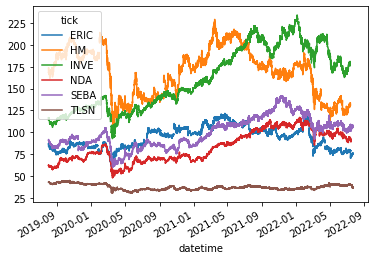

In [6]:
df.set_index(['datetime', 'tick'])['price'].unstack().plot()

In [114]:
df = df.set_index(['tick','date','time'])[['price']].unstack().ffill(axis=1).bfill(axis=1).stack()
df.head()

price
tick date       time              
ERIC 2019-08-01 09:00:00  84.42725
                09:01:00  84.54850
                09:02:00  84.62900
                09:03:00  84.54375
                09:04:00  84.59300

### CREATE FEATURES

In [117]:
# ADD FEATURES

for minutes in [10, 20, 30]:
    print(minutes)
    df['feat_price_'+str(minutes)+'min_max'] = df.unstack()['price'].rolling(minutes, axis=1).max().stack()
    df['feat_price_'+str(minutes)+'min_max_shifted'] = df.unstack()['price'].rolling(minutes, axis=1).max().shift(minutes, axis=1).stack()
    df['feat_price_'+str(minutes)+'min_min'] = df.unstack()['price'].rolling(minutes, axis=1).min().stack()
    df['feat_price_'+str(minutes)+'min_min_shifted'] = df.unstack()['price'].rolling(minutes, axis=1).min().shift(minutes, axis=1).stack()
    
df.head()

10
20
30


price  feat_price_10min_max  \
tick date       time                                       
ERIC 2019-08-01 09:00:00  84.42725                   NaN   
                09:01:00  84.54850                   NaN   
                09:02:00  84.62900                   NaN   
                09:03:00  84.54375                   NaN   
                09:04:00  84.59300                   NaN   

                          feat_price_10min_max_shifted  feat_price_10min_min  \
tick date       time                                                           
ERIC 2019-08-01 09:00:00                           NaN                   NaN   
                09:01:00                           NaN                   NaN   
                09:02:00                           NaN                   NaN   
                09:03:00                           NaN                   NaN   
                09:04:00                           NaN                   NaN   

                          feat_price_10min_min_shifted  feat_price_20min_max  \
tick date       time                                                           
ERIC 2019-08-01 09:00:00                           NaN                   NaN   
                09:01:00                           NaN                   NaN   
                09:02:00                           NaN                   NaN   
                09:03:00                           NaN                   NaN   
                09:04:00                           NaN                   NaN   

                          feat_price_20min_max_shifted  feat_price_20min_min  \
tick date       time                                                           
ERIC 2019-08-01 09:00:00                           NaN                   NaN   
                09:01:00                           NaN                   NaN   
                09:02:00                           NaN                   NaN   
                09:03:00                           NaN                   NaN   
                09:04:00                           NaN                   NaN   

                          feat_price_20min_min_shifted  feat_price_30min_max  \
tick date       time                                                           
ERIC 2019-08-01 09:00:00                           NaN                   NaN   
                09:01:00                           NaN                   NaN   
                09:02:00                           NaN                   NaN   
                09:03:00                           NaN                   NaN   
                09:04:00                           NaN                   NaN   

                          feat_price_30min_max_shifted  feat_price_30min_min  \
tick date       time                                                           
ERIC 2019-08-01 09:00:00                           NaN                   NaN   
                09:01:00                           NaN                   NaN   
                09:02:00                           NaN                   NaN   
                09:03:00                           NaN                   NaN   
                09:04:00                           NaN                   NaN   

                          feat_price_30min_min_shifted  
tick date       time                                    
ERIC 2019-08-01 09:00:00                           NaN  
                09:01:00                           NaN  
                09:02:00                           NaN  
                09:03:00                           NaN  
                09:04:00                           NaN

### ADD RESPONS

In [118]:
pred_time = 60
predict_up = 'resp_price_'+str(pred_time)+'min_max'
predict_down = 'resp_price_'+str(pred_time)+'min_min'

df[predict_up] = df.unstack()['price'].rolling(pred_time, axis=1).max().shift(-pred_time, axis=1).stack()
df[predict_down] = df.unstack()['price'].rolling(pred_time, axis=1).min().shift(-pred_time, axis=1).stack()
df.head()

df = df.reset_index()

### NORMALIZE

In [119]:
features = [column for column in df.columns if 'feat_' in column]
df[features] = df[features].div(df['price'], axis=0)

respons = [column for column in df.columns if 'resp_' in column]
df[respons] = df[respons].div(df['price'], axis=0)

df.tail(5)

,tick,date,time,price,feat_price_10min_max,feat_price_10min_max_shifted,feat_price_10min_min,feat_price_10min_min_shifted,feat_price_20min_max,feat_price_20min_max_shifted,feat_price_20min_min,feat_price_20min_min_shifted,feat_price_30min_max,feat_price_30min_max_shifted,feat_price_30min_min,feat_price_30min_min_shifted,resp_price_60min_max,resp_price_60min_min
2259365,TLSN,2022-07-22,17:20:00,37.14150,1.000404,0.999717,0.999313,0.998694,1.000404,1.000734,0.998694,0.999374,1.000404,1.002140,0.998694,0.999697,NaN,NaN
2259366,TLSN,2022-07-22,17:21:00,37.14075,1.000424,0.999737,0.999334,0.998714,1.000424,1.000754,0.998714,0.999394,1.000424,1.002161,0.998714,0.999717,NaN,NaN
2259367,TLSN,2022-07-22,17:22:00,37.13350,1.000619,0.999953,0.999529,0.998909,1.000619,1.000949,0.998909,0.999010,1.000619,1.002356,0.998909,0.999912,NaN,NaN
2259368,TLSN,2022-07-22,17:23:00,37.13000,1.000714,1.000047,0.999623,0.999004,1.000714,1.001044,0.999004,0.999004,1.000714,1.002451,0.999004,1.000007,NaN,NaN
2259369,TLSN,2022-07-22,17:24:00,37.12725,1.000788,1.000121,1.000000,0.999354,1.000788,1.000909,0.999354,0.999077,1.000788,1.002525,0.999077,1.000081,NaN,NaN


### MODEL

In [120]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn import tree

In [122]:
pct_change = 0.01

df[f'resp_price_{pred_time}min_max_up'] = 0
df.loc[df[f'resp_price_{pred_time}min_max']>1 + pct_change, f'resp_price_{pred_time}min_max_up'] = 1

df[f'resp_price_{pred_time}min_min_down'] = 0
df.loc[df[f'resp_price_{pred_time}min_min']<1 - pct_change, f'resp_price_{pred_time}min_min_down'] = 1

print(df[f'resp_price_{pred_time}min_max_up'].mean())
print(df[f'resp_price_{pred_time}min_min_down'].mean())

0.03147293272018306
0.031795589035881686


In [148]:
from datetime import time

corona_low = '2020-03-01'
corona_high = '2020-05-01'

from_date = '2018-01-01'
to_date = '2022-01-01'


df_train = df[(df['date']>from_date) & (df['date']<to_date)].dropna(axis=0).copy()
df_test = df[((df['date']>=to_date))].dropna(axis=0).copy()


### BUY SIGNAL

In [149]:
#MODEL
X = df_train.loc[:, features]
Y = df_train.loc[:, f'resp_price_{pred_time}min_max_up']

scale_pos_weight = Y[Y == 0].count()/Y[Y==1].count()
print('scale pos: ', scale_pos_weight)

model = XGBClassifier(#scale_pos_weight = scale_pos_weight, 
                      max_depth = 3, eval_metric="error",
                      n_jobs = 8, use_label_encoder=False)

model.fit(X, Y, eval_metric="error",
          verbose=False)

scale pos:  38.524395702775294


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [150]:
X = df_test.loc[:, features]
Y = df_test.loc[:, f'resp_price_{pred_time}min_max_up']

y_pred = model.predict(X)

df_test[f'pred_price_{pred_time}min_max_up'] = y_pred
print(df_test[f'pred_price_{pred_time}min_max_up'].mean())

0.002329696630214765


### SELL SIGNAL

In [81]:
#MODEL
X = df_train.loc[:, features]
Y = df_train.loc[:, f'resp_price_{pred_time}min_min_down']

scale_pos_weight = Y[Y == 0].count()/Y[Y==1].count()
print('scale pos: ', scale_pos_weight)

model = XGBClassifier(scale_pos_weight = scale_pos_weight, 
                      max_depth = 3, eval_metric="error", missing=None,
                      n_jobs = 8, use_label_encoder=False)

model.fit(X, Y, eval_metric="error",
          verbose=False)

scale pos:  34.24801189999428


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=34.24801189999428, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [82]:
X = df.loc[:, features]
Y = df.loc[:, f'resp_price_{pred_time}min_min_down']

y_pred = model.predict(X)

df[f'pred_price_{pred_time}min_min_down'] = y_pred
print(df[f'pred_price_{pred_time}min_min_down'].mean())

0.2549657647928405


### EVALUATE

ERIC 2022-03-01T00:00:00.000000000


<AxesSubplot:title={'center':'ERIC 2022-03-01T00:00:00.000000000'}, xlabel='time'>

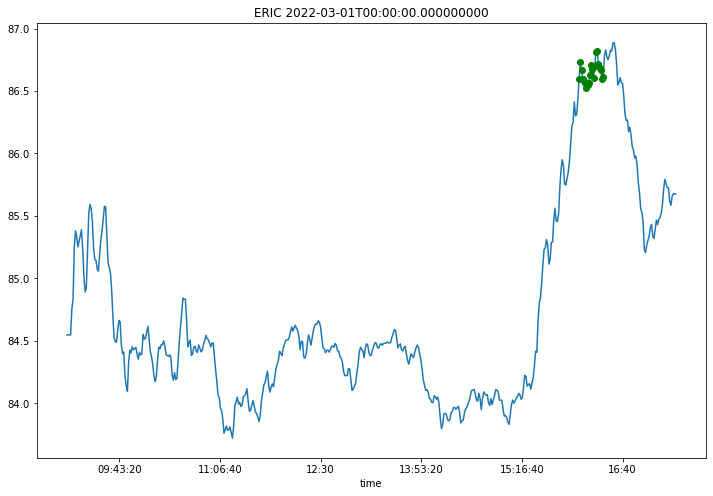

In [229]:
sample = df_test[(df_test[f'pred_price_{pred_time}min_max_up']==1) & (df_test['date']>to_date) & (df_test['date']!='2022-05-02')].sample(1)[['tick', 'date']]

f, ax = plt.subplots(figsize= (12, 8))

tick = sample['tick'].values[0]
date = sample['date'].values[0]

print(tick, date)

df_cell = df[(df['tick']==tick) & (df['date']==date)].copy()
df_cell.set_index('time')['price'].plot(ax=ax, title=f'{tick} {date}')



df_cell = df_test[(df_test['tick']==tick) & (df_test['date']==date)].copy()
df_cell[f'pred_price_{pred_time}min_max_up'] = df_cell[f'pred_price_{pred_time}min_max_up'].replace(0,np.nan)
df_cell[f'pred_price_{pred_time}min_max_up'] = df_cell.groupby(['tick', 'date'])[f'pred_price_{pred_time}min_max_up'].ffill(60)

df_cell[df_cell[f'pred_price_{pred_time}min_max_up']==1].set_index('time')['price'].plot(ls='', marker='o', ax=ax, color='g')
#df_cell[df_cell[f'pred_price_{pred_time}min_min_down']==1].set_index('time')['price'].plot(ls='', marker='o', ax=ax, color='r')

In [232]:
df[''] = df_test[f'pred_price_{pred_time}min_max_up']

308109     0
308110     0
308111     0
308112     0
308113     0
          ..
2259305    0
2259306    0
2259307    0
2259308    0
2259309    0
Name: pred_price_60min_max_up, Length: 314204, dtype: int32

In [231]:
df_test

,tick,date,time,price,feat_price_10min_max,feat_price_10min_max_shifted,feat_price_10min_min,feat_price_10min_min_shifted,feat_price_20min_max,feat_price_20min_max_shifted,...,feat_price_20min_min_shifted,feat_price_30min_max,feat_price_30min_max_shifted,feat_price_30min_min,feat_price_30min_min_shifted,resp_price_60min_max,resp_price_60min_min,resp_price_60min_max_up,resp_price_60min_min_down,pred_price_60min_max_up
308109,ERIC,2022-01-03,09:59:00,100.11750,1.000275,1.000747,0.999268,0.999271,1.000747,1.000362,...,0.998429,1.000747,0.999571,0.998799,0.993423,1.000479,0.994389,0,0,0
308110,ERIC,2022-01-03,10:00:00,100.16075,1.000000,1.000314,0.998837,0.998989,1.000314,0.999930,...,0.997998,1.000314,0.999690,0.998368,0.993802,1.000047,0.993960,0,0,0
308111,ERIC,2022-01-03,10:01:00,100.16550,1.000000,1.000267,0.998790,0.998912,1.000267,0.999883,...,0.997951,1.000267,0.999643,0.998320,0.993755,0.999920,0.993913,0,0,0
308112,ERIC,2022-01-03,10:02:00,100.13475,1.000307,1.000574,0.999209,0.999096,1.000574,1.000190,...,0.998257,1.000574,0.999950,0.998627,0.994061,1.000227,0.994218,0,0,0
308113,ERIC,2022-01-03,10:03:00,100.10700,1.000584,1.000852,0.999575,0.999373,1.000852,1.000474,...,0.998534,1.000852,1.000325,0.998904,0.995230,1.000504,0.994493,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259305,TLSN,2022-07-22,16:20:00,37.19675,1.000457,1.000793,0.999469,0.998145,1.000793,1.001028,...,0.996492,1.000793,1.001028,0.996492,0.996908,1.000652,0.997211,0,0,0
2259306,TLSN,2022-07-22,16:21:00,37.20125,1.000336,1.000672,0.999348,0.998125,1.000672,1.000564,...,0.996371,1.000672,1.000907,0.996371,0.996788,1.000531,0.997090,0,0,0
2259307,TLSN,2022-07-22,16:22:00,37.21350,1.000007,1.000343,0.999019,0.998220,1.000343,1.000168,...,0.996043,1.000343,1.000578,0.996043,0.996238,1.000202,0.996762,0,0,0
2259308,TLSN,2022-07-22,16:23:00,37.20025,1.000363,1.000699,0.999745,0.998931,1.000699,0.999792,...,0.996398,1.000699,1.000934,0.996398,0.996512,1.000558,0.997117,0,0,0


In [136]:
df_cell[df_cell[f'pred_price_{pred_time}min_max_up']==1]

,tick,date,time,price,feat_price_10min_max,feat_price_10min_max_shifted,feat_price_10min_min,feat_price_10min_min_shifted,feat_price_20min_max,feat_price_20min_max_shifted,...,feat_price_30min_max,feat_price_30min_max_shifted,feat_price_30min_min,feat_price_30min_min_shifted,resp_price_60min_max,resp_price_60min_min,resp_price_60min_max_up,resp_price_60min_min_down,pred_price_60min_max_up,pred_price_60min_min_down
347945,ERIC,2022-04-27,09:00:00,81.45250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000236,0.991268,0,0,1,1
347946,ERIC,2022-04-27,09:01:00,81.45000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000267,0.991298,0,0,1,1
347947,ERIC,2022-04-27,09:02:00,81.47175,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.999626,0.991034,0,0,1,1
347948,ERIC,2022-04-27,09:03:00,81.44125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.998916,0.991405,0,0,1,1
347949,ERIC,2022-04-27,09:04:00,81.33275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000249,0.992727,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348434,ERIC,2022-04-27,17:09:00,80.88500,1.000000,1.001351,0.998433,0.996931,1.001351,1.001215,...,1.001351,1.002698,0.996931,0.995469,NaN,NaN,0,0,1,1
348441,ERIC,2022-04-27,17:16:00,80.93650,1.000000,0.998903,0.998638,0.996296,1.000000,1.000714,...,1.000714,0.999830,0.996296,0.994835,NaN,NaN,0,0,1,0
348442,ERIC,2022-04-27,17:17:00,80.89550,1.000507,0.999410,0.999144,0.996801,1.000507,1.001221,...,1.001221,1.000337,0.996801,0.995340,NaN,NaN,0,0,1,1
348443,ERIC,2022-04-27,17:18:00,80.92625,1.000127,0.999311,0.998764,0.996960,1.000127,1.000840,...,1.000840,1.000238,0.996423,0.994961,NaN,NaN,0,0,1,0
